In [1]:
# Compare the energies found from the new fits
# 
# 22-Jul-2024   IGH

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sunpy.io.special import read_genx
from astropy.time import Time
from scipy import constants
import scipy.special as sc

import warnings
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Ubuntu",'mathtext.default':"regular"})

In [3]:
plt.rc('font', family='sans-serif', weight='normal', size=18)
# Need kb for later calculations
k = constants.k

In [4]:
# Load in the new fits
# Like "old" with v5.2 and bpow
b05=read_genx('wee_2024_vth52_bpow.genx')
# Partial "old" with v5.2 but thick2
t05=read_genx('wee_2024_vth52_tt.genx')
# New as with my v10.1 and thick2
t10=read_genx('wee_2024_vth101_t71_tt.genx')

In [5]:
# Was has been save from sswidl, 
# slightly different osx_p and osx_perr for b05 as bpow not thick2
t05["SAVEGEN0"][0]

OrderedDict([('FPEAK', '04-Mar-02 17:52:06'),
             ('OSX_P',
              array([2.4333894e-03, 9.3579521e+00, 1.0000000e+00, 1.6073629e+00,
                     1.0884636e+01, 1.0000000e+03, 1.0000000e+01, 7.5179210e+00,
                     1.0000000e+03], dtype=float32)),
             ('OSX_PERR',
              array([3.4944341e-04, 2.4230894e-02, 0.0000000e+00, 7.6670873e-01,
                     1.1285838e+00, 0.0000000e+00, 0.0000000e+00, 3.7126189e-01,
                     0.0000000e+00], dtype=float32)),
             ('CHISQ', 2.0036208629608154),
             ('FIT_MOD', 'vth52+bpow'),
             ('FIT_ERANGE', array([ 4., 13.], dtype=float32))])

In [6]:
# Load in all the parameters we need

tmk_b05=np.array([r["OSX_P"][1] for r in b05["SAVEGEN0"]])
em_b05=np.array([r["OSX_P"][0]*1e49 for r in b05["SAVEGEN0"]])
gam_b05=np.array([r["OSX_P"][6] for r in b05["SAVEGEN0"]])
eb_b05=np.array([r["OSX_P"][5] for r in b05["SAVEGEN0"]])
ip_b05=np.array([r["OSX_P"][3] for r in b05["SAVEGEN0"]])

tmk_t05=np.array([r["OSX_P"][1] for r in t05["SAVEGEN0"]])
em_t05=np.array([r["OSX_P"][0]*1e49 for r in t05["SAVEGEN0"]])
del_t05=np.array([r["OSX_P"][4] for r in t05["SAVEGEN0"]])
ec_t05=np.array([r["OSX_P"][7] for r in t05["SAVEGEN0"]])
n35_t05=np.array([r["OSX_P"][3] for r in t05["SAVEGEN0"]])

tmk_t10=np.array([r["OSX_P"][1] for r in t10["SAVEGEN0"]])
em_t10=np.array([r["OSX_P"][0]*1e49 for r in t10["SAVEGEN0"]])
del_t10=np.array([r["OSX_P"][4] for r in t10["SAVEGEN0"]])
ec_t10=np.array([r["OSX_P"][7] for r in t10["SAVEGEN0"]])
n35_t10=np.array([r["OSX_P"][3] for r in t10["SAVEGEN0"]])

print(f'Num flares bpow v5.2: {np.count_nonzero(tmk_b05):.0f}')
print(f'Num flares tt v5.2: {np.count_nonzero(tmk_t05):.0f}')
print(f'Num flares tt v10.1: {np.count_nonzero(tmk_t10):.0f}')

Num flares bpow v5.2: 24799
Num flares tt v5.2: 24799
Num flares tt v10.1: 24799


In [7]:
# For comparison load in the old data values
# This also gives the "good ones"
# mind issue with volumes and wt - see other notebook
res=read_genx('../wee_2008/wee_all_v2.genx')
idgdth=res["SAVEGEN0"]["IDGDTH"]
idgdnn=res["SAVEGEN0"]["IDGDNN"]
idgsgdth=res["SAVEGEN0"]["IDGSGDTH"]
idgsgdnn=res["SAVEGEN0"]["IDGSGDNN"]
tmk=res["SAVEGEN0"]["TMK"]
em=res["SAVEGEN0"]["EM"]
norm=res["SAVEGEN0"]["NORM"]
eb=res["SAVEGEN0"]["EB"]
g2=res["SAVEGEN0"]["G2"]
vol=res["SAVEGEN0"]["VOL"]
wt=res["SAVEGEN0"]["ENG_TH"]

In [8]:
# Now calculate the thermal and non-thermal energy from the new fits

# Thermal energy calc using standard formula
wt_b05 = 3*np.sqrt(em_b05*vol)*k*(tmk_b05*1e6)*1e7
wt_t05 = 3*np.sqrt(em_t05*vol)*k*(tmk_t05*1e6)*1e7
wt_t10 = 3*np.sqrt(em_t10*vol)*k*(tmk_t10*1e6)*1e7

# For Non-thermal power*16 use the approx to get Ec then use standard formula for photon spec fit
def ebtoec(eb,gam):
    return 0.15*gam+(1.86-0.04*gam)*eb-3.39
ecg_b05=ebtoec(eb_b05,gam_b05)
feb=ip_b05*(eb_b05/50.)**(-1.5)
f1=feb*eb_b05**gam_b05
betas=sc.beta(gam_b05-0.5,1.5)
wn_b05=16*9.5e24*gam_b05**2*(gam_b05-1)*f1*ecg_b05**(1-gam_b05)*betas

# For thick2 models immediately have all e- dist parameters so just directly calculate
wn_t05 = 16.*(n35_t05*1e35*1.6022e-9)*((del_t05-1)/(del_t05-2))*ec_t05
wn_t10 = 16.*(n35_t10*1e35*1.6022e-9)*((del_t10-1)/(del_t10-2))*ec_t10


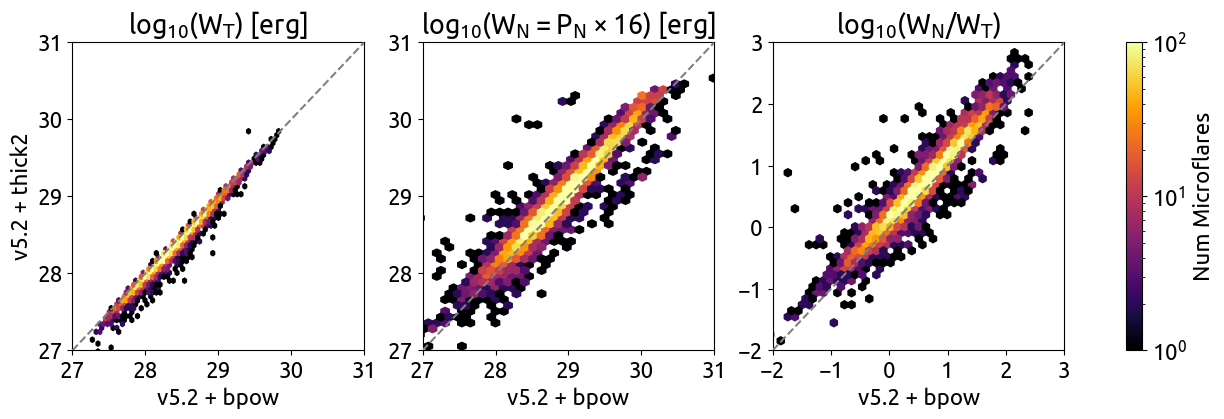

In [9]:
plt.rc('font', family='sans-serif', weight='normal', size=16)

gs=50
vmax=100
wr=[27,31]

fig,axs=plt.subplots(1,3,figsize=(16,4.))
hex1=axs[0].hexbin(np.log10(wt_b05[idgsgdth]),np.log10(wt_t05[idgsgdth]),\
                    gridsize=gs,cmap='inferno',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('$log_{10}(W_\mathrm{T})$ [erg]')
axs[0].set_xlim(wr)
axs[0].set_ylim(wr)
axs[0].set_xlabel('v5.2 + bpow')
axs[0].set_ylabel('v5.2 + thick2')
axs[0].plot(wr,wr,'--',color='grey',zorder=10)
axs[0].locator_params(axis='both',nbins=5)

hex2=axs[1].hexbin(np.log10(wn_b05[idgsgdth]),np.log10(wn_t05[idgsgdth]),\
                    gridsize=gs,cmap='inferno',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title(r'$log_{10}(W_\mathrm{N}=P_\mathrm{N}\times16)$ [erg]')
axs[1].set_xlim(wr)
axs[1].set_ylim(wr)
axs[1].set_xlabel('v5.2 + bpow')
axs[1].set_ylabel('')
axs[1].plot(wr,wr,'--',color='grey',zorder=10)
axs[1].locator_params(axis='both',nbins=5)

rr=[-2,3]
hex3=axs[2].hexbin(np.log10(wn_b05[idgsgdth]/wt_b05[idgsgdth]),np.log10(wn_t05[idgsgdth]/wt_t05[idgsgdth]),\
                    gridsize=gs,cmap='inferno',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_title(r'$log_{10}(W_\mathrm{N}/W_\mathrm{T})$')
axs[2].set_xlim(rr)
axs[2].set_ylim(rr)
axs[2].set_xlabel('v5.2 + bpow')
axs[2].set_ylabel('')
axs[2].plot(rr,rr,'--',color='grey',zorder=10)
axs[2].locator_params(axis='both',nbins=5)
fig.colorbar(hex2, ax=axs.ravel().tolist(),label='Num Microflares')

plt.savefig('engs_52bpow_52thk.pdf',bbox_inches='tight')


plt.show()

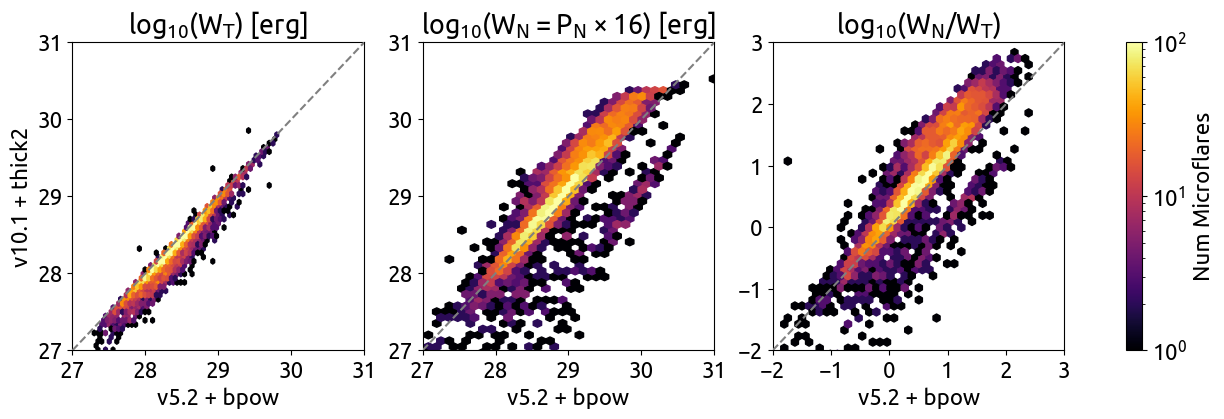

In [10]:
plt.rc('font', family='sans-serif', weight='normal', size=16)

gs=50
vmax=100
wr=[27,31]

fig,axs=plt.subplots(1,3,figsize=(16,4.))
hex1=axs[0].hexbin(np.log10(wt_b05[idgsgdth]),np.log10(wt_t10[idgsgdth]),\
                    gridsize=gs,cmap='inferno',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('$log_{10}(W_\mathrm{T})$ [erg]')
axs[0].set_xlim(wr)
axs[0].set_ylim(wr)
axs[0].set_xlabel('v5.2 + bpow')
axs[0].set_ylabel('v10.1 + thick2')
axs[0].plot(wr,wr,'--',color='grey',zorder=10)
axs[0].locator_params(axis='both',nbins=5)

hex2=axs[1].hexbin(np.log10(wn_b05[idgsgdth]),np.log10(wn_t10[idgsgdth]),\
                    gridsize=gs,cmap='inferno',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title(r'$log_{10}(W_\mathrm{N}=P_\mathrm{N}\times16)$ [erg]')
axs[1].set_xlim(wr)
axs[1].set_ylim(wr)
axs[1].set_xlabel('v5.2 + bpow')
axs[1].set_ylabel('')
axs[1].plot(wr,wr,'--',color='grey',zorder=10)
axs[1].locator_params(axis='both',nbins=5)

rr=[-2,3]
hex3=axs[2].hexbin(np.log10(wn_b05[idgsgdth]/wt_b05[idgsgdth]),np.log10(wn_t10[idgsgdth]/wt_t10[idgsgdth]),\
                    gridsize=gs,cmap='inferno',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_title(r'$log_{10}(W_\mathrm{N}/W_\mathrm{T})$')
axs[2].set_xlim(rr)
axs[2].set_ylim(rr)
axs[2].set_xlabel('v5.2 + bpow')
axs[2].set_ylabel('')
axs[2].plot(rr,rr,'--',color='grey',zorder=10)
axs[2].locator_params(axis='both',nbins=5)
fig.colorbar(hex2, ax=axs.ravel().tolist(),label='Num Microflares')

plt.savefig('engs_52bpow_10thk.pdf',bbox_inches='tight')


plt.show()

In [11]:
# Work out the frequency distributions.... 
# Based off 2008 work but see other notebook before more complete comparison 

maxa=31
mina=21.
nbs=70

# Info from idl files
mnfrac=0.50053798#*idgsgdth.size/wt_b05.size
t = Time(['2002-03-01T00:00:00', '2007-03-01T00:00:00'], format='isot', scale='utc')
tdiff=(t[1]-t[0]).sec
factor=2*3.14*(6.955e10)**2*tdiff*mnfrac/1e50

hth_b05, xat=np.histogram(np.log10(wt_b05[idgsgdth]),bins=nbs,range=(mina,maxa))
ewidt=np.array([10**(xat[i+1])-10**(xat[i]) for i in range(nbs)])
midsat=np.array([0.5*(10**(xat[i+1])+10**(xat[i])) for i in range(nbs)])
fhth_b05=hth_b05/(ewidt*factor)

hth_t05, xat=np.histogram(np.log10(wt_t05[idgsgdth]),bins=nbs,range=(mina,maxa))
fhth_t05=hth_t05/(ewidt*factor)

hth_t10, xat=np.histogram(np.log10(wt_t10[idgsgdth]),bins=nbs,range=(mina,maxa))
fhth_t10=hth_t10/(ewidt*factor)

hnt_b05, xat=np.histogram(np.log10(wn_b05[idgsgdth]),bins=nbs,range=(mina,maxa))
fhnt_b05=hnt_b05/(ewidt*factor)

hnt_t05, xat=np.histogram(np.log10(wn_t05[idgsgdth]),bins=nbs,range=(mina,maxa))
fhnt_t05=hnt_t05/(ewidt*factor)

hnt_t10, xat=np.histogram(np.log10(wn_t10[idgsgdth]),bins=nbs,range=(mina,maxa))
fhnt_t10=hnt_t10/(ewidt*factor)

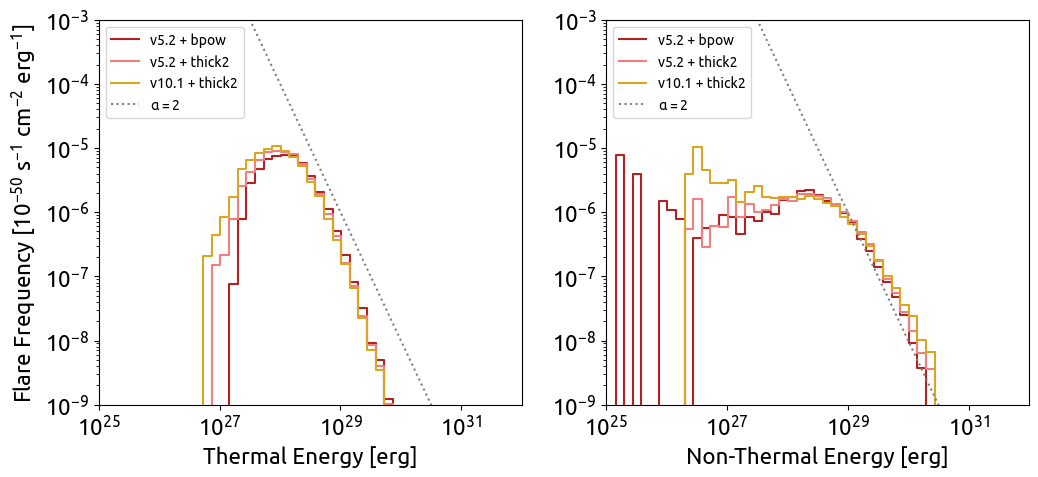

In [19]:
plt.rc('font', family='sans-serif', weight='normal', size=16)

# Plot the thermal enegrgy frequency distribution
fig,axs=plt.subplots(1,2,figsize=(12,5))
axs[0].step(midsat,fhth_b05,where='mid',color='firebrick',label='v5.2 + bpow')
axs[0].step(midsat,fhth_t05,where='mid',color='lightcoral',label='v5.2 + thick2')
axs[0].step(midsat,fhth_t10,where='mid',color='goldenrod',label='v10.1 + thick2')

# Example -2 line for comparison
xl=np.array([1e22,1e32])
axs[0].plot(xl,10**(52-2*np.log10(xl)),color='grey',ls='dotted',label=r'$\alpha=2$')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlabel('Thermal Energy [erg]')
axs[0].set_ylabel('Flare Frequency [10$^{-50}$ s$^{-1}$ cm$^{-2}$ erg$^{-1}$]')
axs[0].set_xlim([1e25,1e32])
axs[0].set_ylim([1e-9,1e-3])
axs[0].legend(loc=2,prop={'size': 10})

# #############################################
# Plot the non-thermal enegrgy frequency distribution
axs[1].step(midsat,fhnt_b05,where='mid',color='firebrick',label='v5.2 + bpow')
axs[1].step(midsat,fhnt_t05,where='mid',color='lightcoral',label='v5.2 + thick2')
axs[1].step(midsat,fhnt_t10,where='mid',color='goldenrod',label='v10.1 + thick2')

# Example -2 line for comparison
xl=np.array([1e22,1e32])
axs[1].plot(xl,10**(52-2*np.log10(xl)),color='grey',ls='dotted',label=r'$\alpha=2$')

axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel('Non-Thermal Energy [erg]')
# axs[1].set_ylabel('Flare Frequency [10$^{-50}$ s$^{-1}$ cm$^{-2}$ erg$^{-1}$]')
axs[1].set_xlim([1e25,1e32])
axs[1].set_ylim([1e-9,1e-3])

axs[1].legend(loc=2,prop={'size': 10})

plt.savefig('comp_freq_dist.pdf',bbox_inches='tight')
plt.show()

In [13]:
# More comparison plots
# Here checking gd thermal+non-thermal whereas above wias 

# gdid=idgsgdth
gdid=idgsgdnn

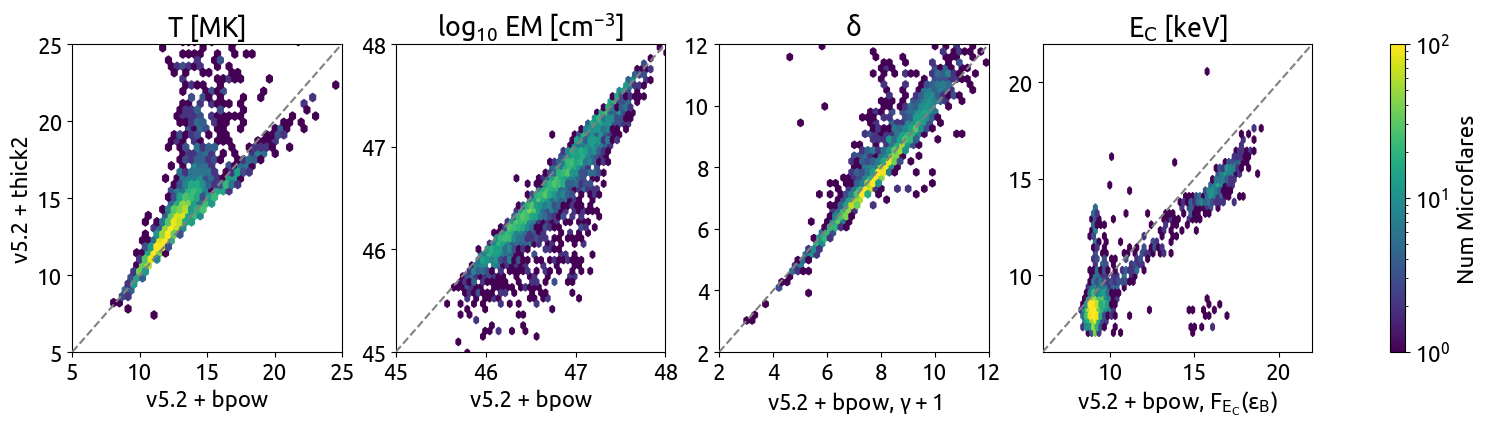

In [14]:
plt.rc('font', family='sans-serif', weight='normal', size=16)

gs=50
vmax=100
tmkr=[5,25]

fig,axs=plt.subplots(1,4,figsize=(20,4))
hex1=axs[0].hexbin(tmk_b05[gdid],tmk_t05[gdid],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('T [MK]')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(tmkr)
axs[0].set_xlabel('v5.2 + bpow')
axs[0].set_ylabel('v5.2 + thick2')
axs[0].plot(tmkr,tmkr,'--',color='grey',zorder=10)
axs[0].locator_params(axis='both',nbins=6)

emr=[45,48]
hex2=axs[1].hexbin(np.log10(em_b05[gdid]),np.log10(em_t05[gdid]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(emr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('v5.2 + bpow')
axs[1].set_ylabel('')
axs[1].plot(emr,emr,'--',color='grey',zorder=10)
axs[1].locator_params(axis='both',nbins=5)

delr=[2,12]
hex3=axs[2].hexbin(gam_b05[gdid]+1,del_t05[gdid],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_title('$\delta$ ')
axs[2].set_xlim(delr)
axs[2].set_ylim(delr)
axs[2].set_xlabel('v5.2 + bpow, $\gamma+1$')
axs[2].set_ylabel('')
axs[2].plot(delr,delr,'--',color='grey',zorder=10)
axs[2].locator_params(axis='both',nbins=5)

ecg_b05=ebtoec(eb_b05[gdid],gam_b05[gdid])
ecr=[6,22]
hex4=axs[3].hexbin(ecg_b05,ec_t05[gdid],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[3].set_title('E$_\mathrm{C}$ [keV]')
axs[3].set_xlim(ecr)
axs[3].set_ylim(ecr)
axs[3].set_xlabel('v5.2 + bpow, $F_\mathrm{E_C}(\epsilon_\mathrm{B})$')
axs[3].set_ylabel('')
axs[3].plot(ecr,ecr,'--',color='grey',zorder=10)
axs[3].locator_params(axis='both',nbins=5)

fig.colorbar(hex1, ax=axs.ravel().tolist(),label='Num Microflares')
plt.savefig('comp_52bpow_52thk.pdf',bbox_inches='tight')

plt.show()

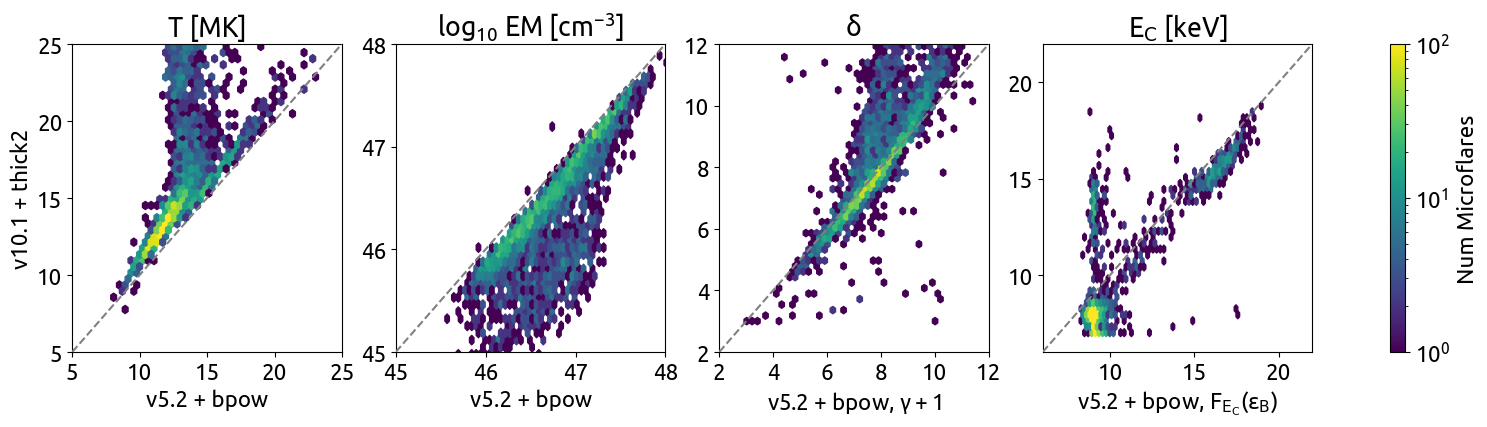

In [15]:

plt.rc('font', family='sans-serif', weight='normal', size=16)

gs=50
vmax=100
tmkr=[5,25]

fig,axs=plt.subplots(1,4,figsize=(20,4))
hex1=axs[0].hexbin(tmk_b05[gdid],tmk_t10[gdid],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('T [MK]')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(tmkr)
axs[0].set_xlabel('v5.2 + bpow')
axs[0].set_ylabel('v10.1 + thick2')
axs[0].plot(tmkr,tmkr,'--',color='grey',zorder=10)
axs[0].locator_params(axis='both',nbins=6)

emr=[45,48]
hex2=axs[1].hexbin(np.log10(em_b05[gdid]),np.log10(em_t10[gdid]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(emr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('v5.2 + bpow')
axs[1].set_ylabel('')
axs[1].plot(emr,emr,'--',color='grey',zorder=10)
axs[1].locator_params(axis='both',nbins=5)

delr=[2,12]
hex3=axs[2].hexbin(gam_b05[gdid]+1,del_t10[gdid],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_title('$\delta$ ')
axs[2].set_xlim(delr)
axs[2].set_ylim(delr)
axs[2].set_xlabel('v5.2 + bpow, $\gamma+1$')
axs[2].set_ylabel('')
axs[2].plot(delr,delr,'--',color='grey',zorder=10)
axs[2].locator_params(axis='both',nbins=5)

ecg_b05=ebtoec(eb_b05[gdid],gam_b05[gdid])
ecr=[6,22]
hex4=axs[3].hexbin(ecg_b05,ec_t10[gdid],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[3].set_title('E$_\mathrm{C}$ [keV]')
axs[3].set_xlim(ecr)
axs[3].set_ylim(ecr)
axs[3].set_xlabel('v5.2 + bpow, $F_\mathrm{E_C}(\epsilon_\mathrm{B})$')
axs[3].set_ylabel('')
axs[3].plot(ecr,ecr,'--',color='grey',zorder=10)
axs[3].locator_params(axis='both',nbins=5)

fig.colorbar(hex1, ax=axs.ravel().tolist(),label='Num Microflares')
plt.savefig('comp_52bpow_10thk.pdf',bbox_inches='tight')

plt.show()

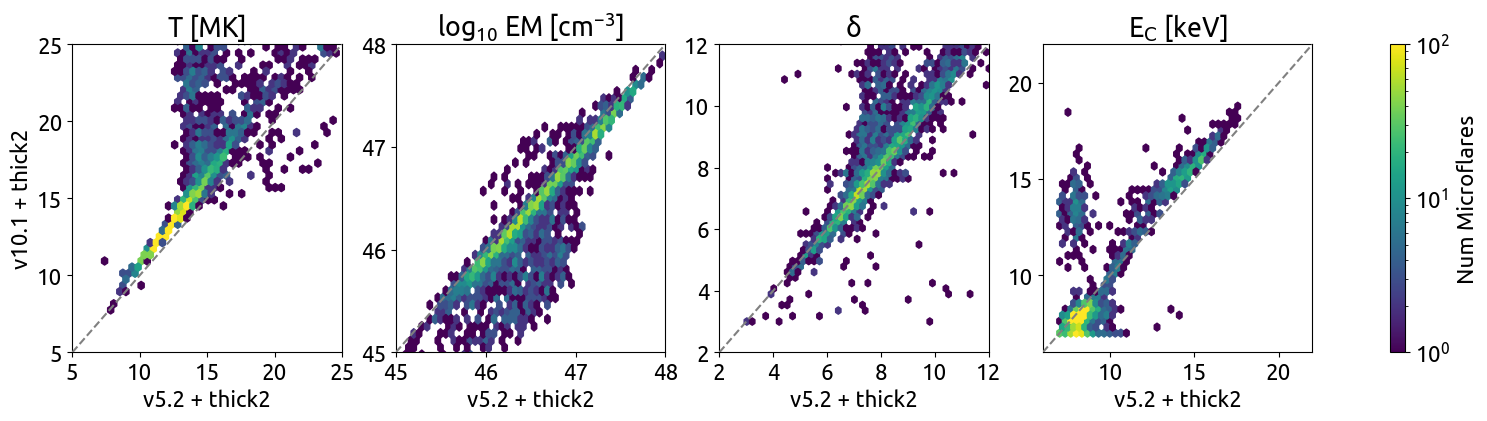

In [16]:
plt.rc('font', family='sans-serif', weight='normal', size=16)

gs=50
vmax=100
tmkr=[5,25]

# gdid=idgsgdth
gdid=idgsgdnn

fig,axs=plt.subplots(1,4,figsize=(20,4))
hex1=axs[0].hexbin(tmk_t05[gdid],tmk_t10[gdid],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('T [MK]')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(tmkr)
axs[0].set_xlabel('v5.2 + thick2')
axs[0].set_ylabel('v10.1 + thick2')
axs[0].plot(tmkr,tmkr,'--',color='grey',zorder=10)
axs[0].locator_params(axis='both',nbins=6)

emr=[45,48]
hex2=axs[1].hexbin(np.log10(em_t05[gdid]),np.log10(em_t10[gdid]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(emr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('v5.2 + thick2')
axs[1].set_ylabel('')
axs[1].plot(emr,emr,'--',color='grey',zorder=10)
axs[1].locator_params(axis='both',nbins=5)

delr=[2,12]
hex3=axs[2].hexbin(del_t05[gdid],del_t10[gdid],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_title('$\delta$ ')
axs[2].set_xlim(delr)
axs[2].set_ylim(delr)
axs[2].set_xlabel('v5.2 + thick2')
axs[2].set_ylabel('')
axs[2].plot(delr,delr,'--',color='grey',zorder=10)
axs[2].locator_params(axis='both',nbins=5)

ecr=[6,22]
hex4=axs[3].hexbin(ec_t05[gdid],ec_t10[gdid],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[3].set_title('E$_\mathrm{C}$ [keV]')
axs[3].set_xlim(ecr)
axs[3].set_ylim(ecr)
axs[3].set_xlabel('v5.2 + thick2')
axs[3].set_ylabel('')
axs[3].plot(ecr,ecr,'--',color='grey',zorder=10)
axs[3].locator_params(axis='both',nbins=5)

fig.colorbar(hex1, ax=axs.ravel().tolist(),label='Num Microflares')
plt.savefig('comp_52thk_10thk.pdf',bbox_inches='tight')

plt.show()

----

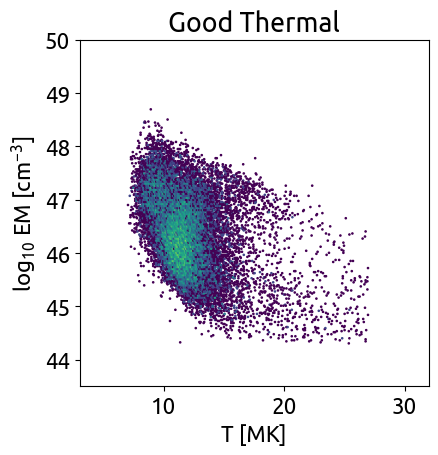

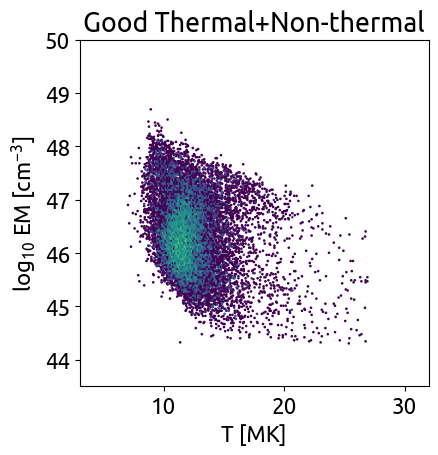

In [17]:
# try a new good based off the new files
gdth05=np.where((tmk_b05 > 7) & (tmk_b05 <27) & (em_b05 > 2e44) & (em_b05 < 9e49))

gs=200
vmax=30
tmkr=[3,32]
emr=[43.5,50]
fig,ax=plt.subplots(figsize=(4.5,4.5))
ax.hexbin(tmk_b05[gdth05],np.log10(em_b05[gdth05]),gridsize=gs,cmap='viridis',\
        norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax),label='v7.1')
ax.set_title('Good Thermal')
ax.set_xlim(tmkr)
ax.set_ylim(emr)
ax.set_ylabel('log$_{10}$ EM [cm$^{-3}$]')
ax.set_xlabel('T [MK]')
plt.show()

gdthnn05=np.where((tmk_b05 > 7) & (tmk_b05 <27) & (em_b05 > 2e44) & (em_b05 < 9e49) \
                  & (eb_b05 > 7) & (eb_b05 < 19) & (gam_b05 > 2.5) & (gam_b05 <10.5))
gs=200
vmax=30
tmkr=[3,32]
emr=[43.5,50]
fig,ax=plt.subplots(figsize=(4.5,4.5))
ax.hexbin(tmk_b05[gdthnn05],np.log10(em_b05[gdthnn05]),gridsize=gs,cmap='viridis',\
        norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax),label='v7.1')
ax.set_title('Good Thermal+Non-thermal')
ax.set_xlim(tmkr)
ax.set_ylim(emr)
ax.set_ylabel('log$_{10}$ EM [cm$^{-3}$]')
ax.set_xlabel('T [MK]')
plt.show()
